In [1]:
!pip uninstall -y torch torchvision torchaudio diffusers transformers accelerate xformers bitsandbytes peft datasets huggingface_hub safetensors

!pip install diffusers==0.30.0 transformers accelerate safetensors torchvision torch --upgrade
!pip install -q diffusers==0.30.0 transformers accelerate safetensors bitsandbytes datasets xformers peft
!pip -q install huggingface_hub datasets

!pip install git+https://github.com/openai/CLIP.git


# !pip install torch==2.6.0 torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121 --upgrade
# !pip install diffusers==0.30.0 transformers accelerate safetensors xformers==0.0.27.post2 bitsandbytes==0.43.3
# !pip install huggingface_hub datasets peft


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0
Found existing installation: transformers 4.57.3
Uninstalling transformers-4.57.3:
  Successfully uninstalled transformers-4.57.3
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Found existing installation: peft 0.18.0
Uninstalling peft-0.18.0:
  Successfully uninstalled peft-0.18.0
Found existing installation: datasets 4.0.0
Uninstalling datasets-4.0.0:
  Successfully uninstalled datasets-4.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import diffusers
import numpy as np
import random

import torch
from huggingface_hub import snapshot_download
from datasets import load_dataset, Image, Value, Features
import os



#smaller dataset
# repo_dir = snapshot_download("inmortalkaktus/pokemon-pixel-art", repo_type="dataset")
# pq = os.path.join(repo_dir, "data", "train-00000-of-00001.parquet")
# features = Features({"image": Image(), "text": Value("string")})
# ds = load_dataset("parquet", data_files=pq, features=features)["train"]

#larger dataset
repo_dir = snapshot_download("ffurfaro/PixelBytes-PokemonAll", repo_type="dataset")
pq = os.path.join(repo_dir, "data", "train-00000-of-00001.parquet")
ds = load_dataset("parquet", data_files=pq)["train"]
ds = ds.remove_columns([c for c in ds.column_names if c not in ["image", "text"]])

print(ds.column_names, len(ds))



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/437 [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

['image', 'text'] 533


In [4]:
def seed_everything(seed=2000):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(2000)

In [5]:
def load_model():

  MODEL_ID = "OFA-Sys/small-stable-diffusion-v0"
  device = "cuda" if torch.cuda.is_available() else "cpu"

  # load the pipeline (FP16 if GPU supports it)
  pipe = diffusers.StableDiffusionPipeline.from_pretrained(MODEL_ID, torch_dtype=torch.float16 if device=="cuda" else torch.float32)
  pipe = pipe.to(device)
  # pipe.enable_xformers_memory_efficient_attention() if hasattr(pipe, "enable_xformers_memory_efficient_attention") else None

  try:
      pipe.enable_xformers_memory_efficient_attention()
  except Exception as e:
      print("⚠️ Skipping xformers:", e)

  print("Loaded model:", MODEL_ID, "on", device)


  return pipe, device

pipe, device = load_model()

model_index.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

safety_checker/pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.bin:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/836 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
`torch_dtype` is deprecated! Use `dtype` instead!
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--smal

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda


In [6]:
save_dir = "/content/pokemon/train"
os.makedirs(save_dir, exist_ok=True)

for i, sample in enumerate(ds):
    # Save image
    img = sample["image"]      # PIL.Image
    img.save(f"{save_dir}/{i:04d}.png")

    # Save caption text
    caption = sample["text"]
    with open(f"{save_dir}/{i:04d}.txt", "w") as f:
        f.write(caption)

print("Done! Saved", len(ds), "images + captions to:", save_dir)



Done! Saved 533 images + captions to: /content/pokemon/train


In [7]:
# # --- ADD LoRA ---

# from peft import LoraConfig, get_peft_model
# import torch.nn as nn


# def lora(pipe, device, RANK=4):

#   RANK = 4

#   unet = pipe.unet

#   lora_config = LoraConfig(
#       r=RANK,
#       lora_alpha=16,
#       target_modules=["to_q", "to_k", "to_v", "to_out.0", "proj_out"],
#       lora_dropout=0.05,
#       bias="none"
#   )

#   unet = get_peft_model(unet, lora_config)
#   unet.to(device)
#   pipe.unet = unet

#   trainable = [p for p in unet.parameters() if p.requires_grad]
#   print("✅ LoRA attached. Trainable params:", sum(p.numel() for p in trainable))

#   return unet, trainable

# unet, trainable = lora(pipe, device)

In [8]:
# --- Full Rank Fine Tuning ---

def full_rank(pipe, device):
  unet = pipe.unet

  # # 1. Enable Gradient Checkpointing
  # unet.enable_gradient_checkpointing()

  # # 3. Freeze text encoder unless intentionally training
  # pipe.text_encoder.requires_grad_(False)

  # Make every parameter in the UNet trainable
  for p in unet.parameters():
      p.requires_grad = True

  unet.to(device)
  pipe.unet = unet

  # Get all trainable parameters (this will now be the full UNet)
  trainable = [p for p in unet.parameters() if p.requires_grad]
  print("✅ Full Rank. Trainable params:", sum(p.numel() for p in trainable))

  return unet, trainable

unet, trainable = full_rank(pipe, device)


✅ Full Rank. Trainable params: 579384964


Plot Losses

In [9]:
import matplotlib.pyplot as plt
import torch
import clip

# --------------------------------------
# Storage for logs
# --------------------------------------
train_losses = []
val_losses = []
clip_scores = []

# --------------------------------------
# CLIP model for similarity
# --------------------------------------
clip_model, clip_preprocess = clip.load("ViT-B/32", device=device)

from torchvision.transforms.functional import to_pil_image

def compute_clip_score(imgs, texts):
    """
    imgs: tensor batch in [-1,1]
    texts: list of captions
    """

    # ---- 1. Truncate long captions for CLIP (max context length 77 tokens) ----
    # Hard truncate to ~200 chars (safe for CLIP)
    texts = [t[:200] for t in texts]

    # ---- 2. Convert tensors → PIL ----
    pil_imgs = []
    for img in imgs:
        img = (img * 0.5 + 0.5).clamp(0,1)
        pil_imgs.append(to_pil_image(img.cpu()))

    # ---- 3. Preprocess for CLIP ----
    imgs_pre = torch.stack([clip_preprocess(p) for p in pil_imgs]).to(device)

    # truncate=True prevents CLIP errors
    text_tokens = clip.tokenize(texts, truncate=True).to(device)

    with torch.no_grad():
        img_feat = clip_model.encode_image(imgs_pre)
        txt_feat = clip_model.encode_text(text_tokens)

    img_feat /= img_feat.norm(dim=-1, keepdim=True)
    txt_feat /= txt_feat.norm(dim=-1, keepdim=True)

    similarity = (img_feat * txt_feat).sum(dim=-1)
    return similarity.mean().item()


# --------------------------------------
# Validation step
# --------------------------------------
def validate(val_loader, vae, text_encoder, tokenizer, noise_scheduler):
    unet.eval()
    total_loss = 0
    count = 0

    with torch.no_grad():
        for imgs, captions in val_loader:
            imgs = imgs.to(device, dtype=torch.float16 if device=="cuda" else torch.float32)

            latents = vae.encode(imgs).latent_dist.sample() * 0.18215

            # Add noise
            noise = torch.randn_like(latents)
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps,
                (latents.shape[0],), device=device
            ).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            # Text encode
            text_inputs = tokenizer(
                captions, padding="max_length", truncation=True,
                max_length=tokenizer.model_max_length,
                return_tensors="pt"
            ).to(device)

            enc = text_encoder(text_inputs.input_ids)[0]

            # Predict noise
            pred = unet(noisy_latents, timesteps, encoder_hidden_states=enc).sample
            loss = ((pred - noise) ** 2).mean()

            total_loss += loss.item()
            count += 1

    unet.train()
    return total_loss / count


# --------------------------------------
# Plotting function
# --------------------------------------
def plot_losses(train_losses, val_losses, learning_rate, weight_decay):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Train vs Validation Loss (lr={learning_rate}, wd={weight_decay})")
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_clip_scores(clip_scores, learning_rate, weight_decay):
    epochs = range(1, len(clip_scores) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, clip_scores, label="CLIP Score")
    plt.xlabel("Epoch")
    plt.ylabel("CLIP Score")
    plt.title(f"CLIP Score per Epoch (lr={learning_rate}, wd={weight_decay})")
    plt.grid(True)
    plt.show()


100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 87.9MiB/s]


In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from tqdm.auto import tqdm
import torch
from torch.optim import AdamW
import os

class SimpleDataset(Dataset):
    def __init__(self, folder):
        self.files = sorted([f for f in os.listdir(folder) if f.endswith(".png")])
        self.folder = folder
        self.transform = transforms.Compose([
            transforms.Resize((512,512), interpolation=Image.NEAREST),
            transforms.ToTensor(),
            transforms.Normalize([0.5]*3, [0.5]*3)
        ])
    def __len__(self):
        return len(self.files)
    def __getitem__(self, idx):
        img_path = os.path.join(self.folder, self.files[idx])
        txt_path = img_path.replace(".png", ".txt")

        img = Image.open(img_path).convert("RGB")
        with open(txt_path, "r") as f:
            caption = f.read().strip()
        return self.transform(img), caption



def train(learning_rate, weight_decay, num_epochs=10, batch_size=4): # Change batch size to 4

    pipe, device = load_model()
    unet, trainable = full_rank(pipe, device)



    dataset = SimpleDataset(save_dir)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    val_size = max(1, len(dataset) // 10)
    train_subset, val_subset = torch.utils.data.random_split(dataset, [len(dataset)-val_size, val_size])
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    optimizer = AdamW(trainable, lr=learning_rate, weight_decay=weight_decay, eps = 5e-6) # numerical stability was eps = 5e-6

    vae = pipe.vae
    noise_scheduler = pipe.scheduler
    tokenizer = pipe.tokenizer
    text_encoder = pipe.text_encoder
    unet.train()

    # Clear logs for new run
    train_losses.clear()
    val_losses.clear()
    clip_scores.clear()

    for epoch in range(num_epochs):

        epoch_loss = 0.0
        batches = 0

        for imgs, captions in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
            imgs = imgs.to(device, dtype=torch.float16 if device=="cuda" else torch.float32)

            with torch.no_grad():
                latents = vae.encode(imgs).latent_dist.sample() * 0.18215

            noise = torch.randn_like(latents)
            timesteps = torch.randint(
                0, noise_scheduler.config.num_train_timesteps,
                (latents.shape[0],), device=device
            ).long()
            noisy_latents = noise_scheduler.add_noise(latents, noise, timesteps)

            text_inputs = tokenizer(
                captions,
                padding="max_length",
                max_length=tokenizer.model_max_length,
                truncation=True,
                return_tensors="pt"
            ).to(device)

            with torch.no_grad():
                encoder_hidden_states = text_encoder(text_inputs.input_ids)[0]

            pred = unet(noisy_latents, timesteps, encoder_hidden_states=encoder_hidden_states).sample
            loss = ((pred - noise) ** 2).mean()
            # print(loss)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            batches += 1

        avg_train_loss = epoch_loss / batches
        train_losses.append(avg_train_loss)

        # ----- VALIDATION -----
        val_loss = validate(val_loader, vae, text_encoder, tokenizer, noise_scheduler)
        val_losses.append(val_loss)

        # ----- CLIP SCORE -----
        clip_score = compute_clip_score(*next(iter(val_loader)))
        clip_scores.append(clip_score)

        print(f"Epoch {epoch+1}: train={avg_train_loss:.4f}, val={val_loss:.4f}, clip={clip_score:.4f}")

        unet.save_pretrained(f"/content/adamw/lora_epoch_{epoch+1}")


    print("Training complete.")

    # ---------------------------------------------------------
    #                   PLOT RESULTS
    # ---------------------------------------------------------
    plot_losses(train_losses, val_losses, learning_rate, weight_decay)
    # plot_clip_scores(clip_scores, learning_rate, weight_decay)

    # avg_train = sum(train_losses) / len(train_losses)
    # avg_val   = sum(val_losses) / len(val_losses)
    # avg_clip  = sum(clip_scores) / len(clip_scores)

    print("\n===== FINAL METRICS =====")
    print(f"Training Loss:    {train_losses[-1]:.4f}")
    print(f"Validation Loss:  {val_losses[-1]:.4f}")
    print(f"CLIP Score:       {clip_scores[-1]:.4f}")

    return {
        'avg_train_loss': train_losses[-1],
        'avg_val_loss': val_losses[-1],
        'avg_clip_score': clip_scores[-1],
        'all_train_loss' : train_losses[:-1],
        'all_val_loss' : val_losses[:-1],
        'all_clip_score' : clip_scores[:-1]
    }


text_encoder/model.safetensors not found


RUNNINNG FOR:
Learning Rate: 1e-06
Weight Decay: 0.1


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1866, val=0.3325, clip=0.3125


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.1445, val=0.3037, clip=0.3125


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.1472, val=0.3684, clip=0.3125


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.1525, val=0.3346, clip=0.3125


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.1294, val=0.4313, clip=0.3125


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.2755, val=0.2453, clip=0.3125


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.1429, val=0.3119, clip=0.3125


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.1321, val=0.3515, clip=0.3125


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.1349, val=0.2789, clip=0.3125


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.1383, val=0.2708, clip=0.3125
Training complete.


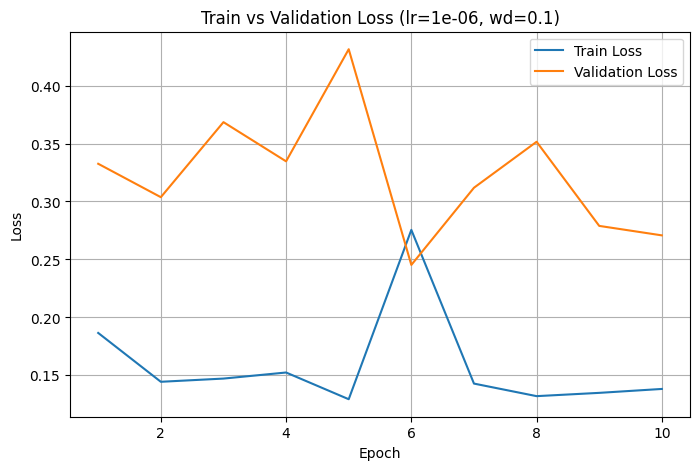


===== FINAL METRICS =====
Training Loss:    0.1383
Validation Loss:  0.2708
CLIP Score:       0.3125
{(1e-06, 0.1): {'avg_train_loss': 0.1382904052734375, 'avg_val_loss': 0.27076939174107145, 'avg_clip_score': 0.3125, 'all_train_loss': [0.18659985860188802, 0.14446512858072916, 0.14723765055338542, 0.15246988932291666, 0.12942479451497396, 0.2754961649576823, 0.14291470845540363, 0.1320826212565104, 0.13491058349609375], 'all_val_loss': [0.33253261021205355, 0.3037109375, 0.368438720703125, 0.334625244140625, 0.4313441685267857, 0.245269775390625, 0.3118504115513393, 0.3515101841517857, 0.2789393833705357], 'all_clip_score': [0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125, 0.3125]}}
--------------------------------------------------
RUNNINNG FOR:
Learning Rate: 1e-06
Weight Decay: 0.01


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

In [ ]:

lrs = [1e-6, 1e-7, 1e-8, 1e-9] # MODEL DIVERGES FOR LR > 1e-6
wds = [1e-1, 1e-2, 1e-3, 1e-4]
INDIVIDUAL_RUN = False
EPOCHS = 10


if INDIVIDUAL_RUN:
  lrs = [1e-6]
  wds = [1e-2]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print(result)
    print("-"*50)

In [ ]:
pipe.safety_checker = lambda images, clip_input: (images, [False] * images.shape[0])

prompt = "a cute pixel art dragon pokemon creature"
image = pipe(prompt, num_inference_steps=20).images[0]
image.save("/content/adamw/test_output.png")
print("✅ Saved:", "/content/adamw/test_output.png")


In [ ]:
result

In [ ]:
best_combo = min(result, key=lambda k: result[k]['val_loss'])
best_combo

RUNNINNG FOR:
Learning Rate: 1e-09
Weight Decay: 0.0001


safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
The config attributes {'predict_epsilon': True} were passed to DPMSolverMultis

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 1: train=0.3494, val=0.3022, clip=0.3188


Epoch 2/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 2: train=0.3384, val=0.3641, clip=0.3188


Epoch 3/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 3: train=0.3254, val=0.3872, clip=0.3188


Epoch 4/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 4: train=0.3365, val=0.3845, clip=0.3188


Epoch 5/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 5: train=0.3407, val=0.3583, clip=0.3188


Epoch 6/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 6: train=0.3481, val=0.3366, clip=0.3188


Epoch 7/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 7: train=0.3424, val=0.3523, clip=0.3188


Epoch 8/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 8: train=0.3332, val=0.2179, clip=0.3188


Epoch 9/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 9: train=0.3377, val=0.3917, clip=0.3188


Epoch 10/10:   0%|          | 0/240 [00:00<?, ?it/s]

Epoch 10: train=0.3322, val=0.3234, clip=0.3188
Training complete.


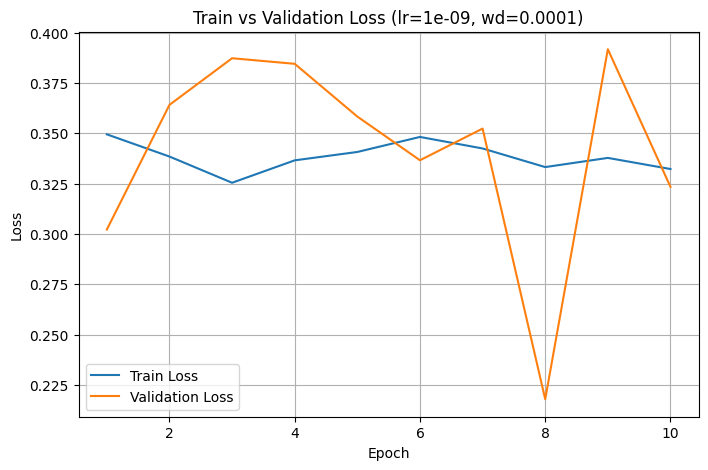


===== FINAL METRICS =====
Training Loss:    0.3322
Validation Loss:  0.3234
CLIP Score:       0.3188
--------------------------------------------------


In [ ]:
EPOCHS = 10
lrs = [1e-9]
wds = [1e-4]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print("-"*50)

In [ ]:

lrs = [1e-5, 5e-6] # MODEL DIVERGES FOR LR > 1e-6
wds = [1e-1, 1e-2, 1e-3, 1e-4]
INDIVIDUAL_RUN = False
EPOCHS = 10


if INDIVIDUAL_RUN:
  lrs = [1e-6]
  wds = [1e-2]

result = {}
#hyperparameter tuning
for lr in lrs:
  for wd in wds:
    print(f"RUNNINNG FOR:")
    print(f"Learning Rate: {lr}")
    print(f"Weight Decay: {wd}")
    result[(lr, wd)] = train(
        learning_rate=lr,
        weight_decay=wd,
        num_epochs=EPOCHS
    )
    print(result)
    print("-"*50)

In [ ]:
result

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def run_multiple(learning_rate, weight_decay, num_epochs=10, batch_size=4, runs=5):
    """
    Runs your training function N times and computes error bars.
    """

    all_train = []
    all_val = []

    for r in range(runs):
        print(f"\n============================")
        print(f"🔥 RUN {r+1}/{runs}")
        print(f"============================")

        out = train(
            learning_rate=learning_rate,
            weight_decay=weight_decay,
            num_epochs=num_epochs,
            batch_size=batch_size,
        )

        # Copy the global logs after this run
        all_train.append(train_losses.copy())
        all_val.append(val_losses.copy())

    # Convert to NumPy arrays → shape (runs, epochs+1)
    all_train = np.array(all_train)
    all_val = np.array(all_val)

    # Compute mean/stdev along axis=0
    train_mean = all_train.mean(axis=0)
    train_std  = all_train.std(axis=0)

    val_mean = all_val.mean(axis=0)
    val_std  = all_val.std(axis=0)

    # -----------------------------
    #    Plot with error bars
    # -----------------------------
    epochs = np.arange(len(train_mean))

    plt.figure(figsize=(10,6))

    plt.errorbar(
        epochs, train_mean, yerr=train_std,
        fmt='-o', capsize=4, label="Train Loss (mean ± std)"
    )
    plt.errorbar(
        epochs, val_mean, yerr=val_std,
        fmt='-o', capsize=4, label="Val Loss (mean ± std)"
    )

    plt.ylim(0.10, 0.50)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss w/ Error Bars over {runs} Runs")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -----------------------------------
    #  Print epoch-by-epoch summary
    # -----------------------------------
    print("\n===== MEAN ± STD PER EPOCH =====")
    for e in range(len(train_mean)):
        print(f"Epoch {e}: "
              f"Train {train_mean[e]:.4f} ± {train_std[e]:.4f} | "
              f"Val {val_mean[e]:.4f} ± {val_std[e]:.4f}")

    return {
        "train_mean": train_mean,
        "train_std":  train_std,
        "val_mean":   val_mean,
        "val_std":    val_std,
        "raw_train":  all_train,
        "raw_val":    all_val,
    }


text_encoder/model.safetensors not found



🔥 RUN 1/5


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1913, val=0.3325, clip=0.3125


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.1556, val=0.3037, clip=0.3125


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.2720, val=0.3684, clip=0.3125


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.1673, val=0.3346, clip=0.3125


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.1399, val=0.4313, clip=0.3125


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.1414, val=0.2453, clip=0.3125


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.1454, val=0.3119, clip=0.3125


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.1406, val=0.3515, clip=0.3125


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.1409, val=0.2789, clip=0.3125


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.1364, val=0.2708, clip=0.3125
Training complete.


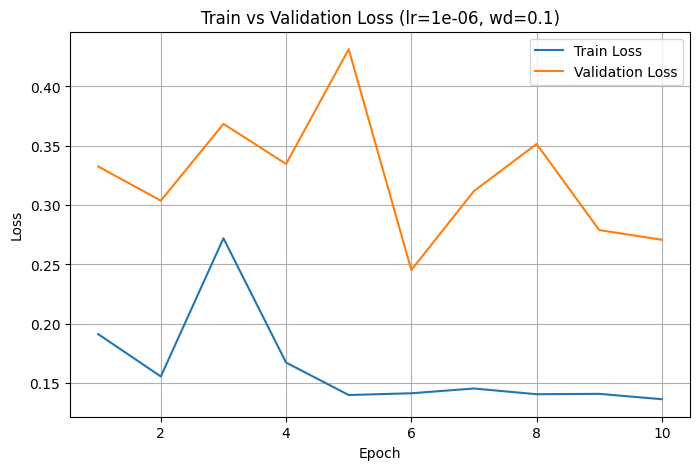


===== FINAL METRICS =====
Training Loss:    0.1364
Validation Loss:  0.2708
CLIP Score:       0.3125

🔥 RUN 2/5


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1723, val=0.3728, clip=0.3140


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.0974, val=0.2672, clip=0.3140


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.0946, val=0.4195, clip=0.3140


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.0974, val=0.3852, clip=0.3140


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.0954, val=0.3409, clip=0.3140


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.0830, val=0.3367, clip=0.3140


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.0807, val=0.3619, clip=0.3140


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.0774, val=0.3234, clip=0.3140


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.0799, val=0.3929, clip=0.3140


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.0793, val=0.3277, clip=0.3140
Training complete.


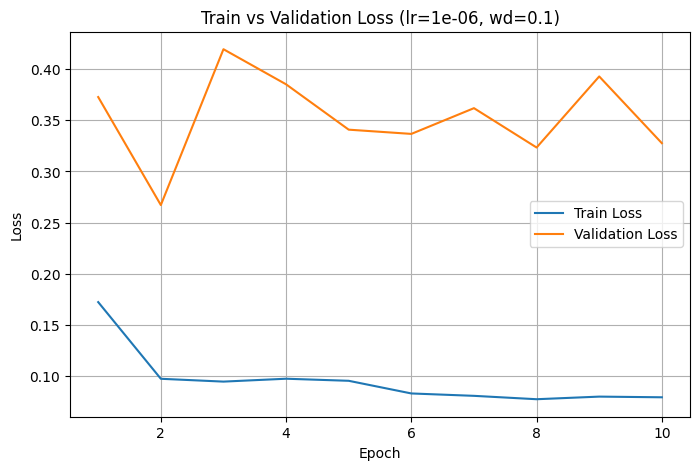


===== FINAL METRICS =====
Training Loss:    0.0793
Validation Loss:  0.3277
CLIP Score:       0.3140

🔥 RUN 3/5


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1563, val=0.3408, clip=0.3140


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.1100, val=0.3320, clip=0.3140


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.1096, val=0.3502, clip=0.3140


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.1193, val=0.3198, clip=0.3140


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.1320, val=0.2687, clip=0.3140


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.1865, val=0.3654, clip=0.3140


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.1030, val=0.4353, clip=0.3140


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.1015, val=0.3990, clip=0.3140


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.1807, val=0.3694, clip=0.3140


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.1392, val=0.4881, clip=0.3140
Training complete.


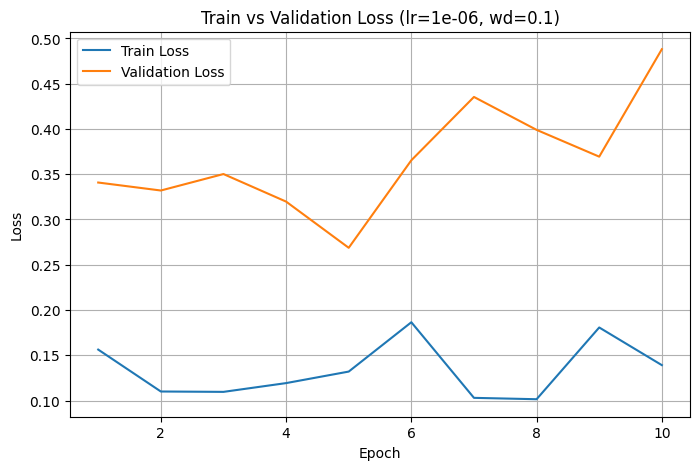


===== FINAL METRICS =====
Training Loss:    0.1392
Validation Loss:  0.4881
CLIP Score:       0.3140

🔥 RUN 4/5


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1535, val=0.3666, clip=0.3020


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.1085, val=0.3925, clip=0.3020


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.1063, val=0.3135, clip=0.3020


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.0966, val=0.3185, clip=0.3020


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.1277, val=0.3249, clip=0.3020


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.1681, val=0.3306, clip=0.3020


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.3766, val=0.3475, clip=0.3020


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.1828, val=0.3473, clip=0.3020


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.2207, val=0.3238, clip=0.3020


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.3485, val=0.3172, clip=0.3020
Training complete.


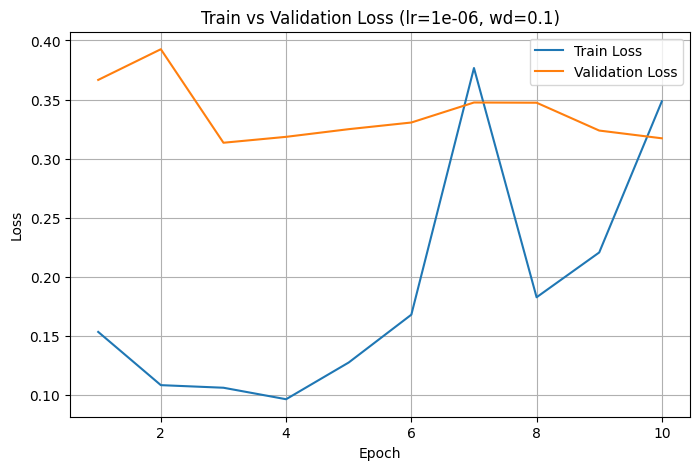


===== FINAL METRICS =====
Training Loss:    0.3485
Validation Loss:  0.3172
CLIP Score:       0.3020

🔥 RUN 5/5


text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'predict_epsilon': True} were passed to DPMSolverMultistepScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717a47a81e7543cd01c1a8140/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--OFA-Sys--small-stable-diffusion-v0/snapshots/38e10e5e71e8fbf717

Loaded model: OFA-Sys/small-stable-diffusion-v0 on cuda
✅ Full Rank. Trainable params: 579384964


Epoch 1/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 1: train=0.1565, val=0.4414, clip=0.3210


Epoch 2/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 2: train=0.1120, val=0.3819, clip=0.3210


Epoch 3/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 3: train=0.0976, val=0.2985, clip=0.3210


Epoch 4/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 4: train=0.0931, val=0.3740, clip=0.3210


Epoch 5/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 5: train=0.1159, val=0.3120, clip=0.3210


Epoch 6/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 6: train=0.0949, val=0.4028, clip=0.3210


Epoch 7/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 7: train=0.2175, val=0.4215, clip=0.3210


Epoch 8/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 8: train=0.3957, val=0.4056, clip=0.3210


Epoch 9/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 9: train=0.1923, val=0.3455, clip=0.3210


Epoch 10/10:   0%|          | 0/120 [00:00<?, ?it/s]

Epoch 10: train=0.2132, val=0.3475, clip=0.3210
Training complete.


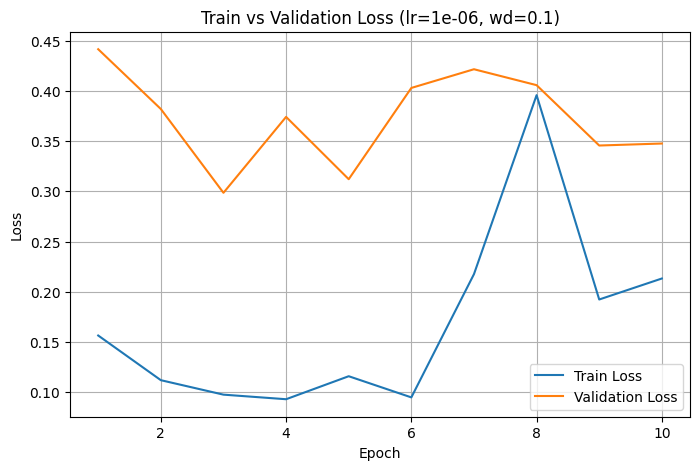


===== FINAL METRICS =====
Training Loss:    0.2132
Validation Loss:  0.3475
CLIP Score:       0.3210


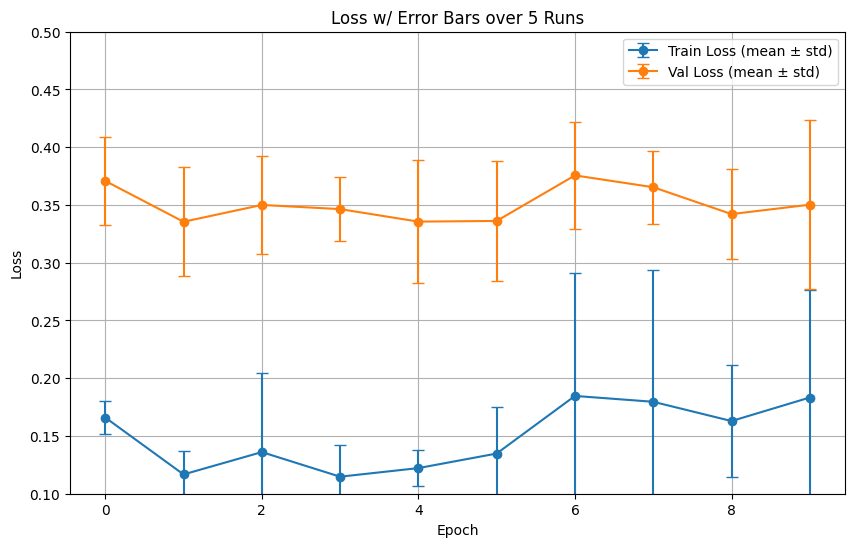


===== MEAN ± STD PER EPOCH =====
Epoch 0: Train 0.1660 ± 0.0143 | Val 0.3708 ± 0.0384
Epoch 1: Train 0.1167 ± 0.0201 | Val 0.3355 ± 0.0471
Epoch 2: Train 0.1360 ± 0.0682 | Val 0.3500 ± 0.0428
Epoch 3: Train 0.1147 ± 0.0279 | Val 0.3464 ± 0.0279
Epoch 4: Train 0.1222 ± 0.0155 | Val 0.3356 ± 0.0535
Epoch 5: Train 0.1348 ± 0.0403 | Val 0.3362 ± 0.0521
Epoch 6: Train 0.1847 ± 0.1067 | Val 0.3756 ± 0.0463
Epoch 7: Train 0.1796 ± 0.1138 | Val 0.3654 ± 0.0317
Epoch 8: Train 0.1629 ± 0.0488 | Val 0.3421 ± 0.0392
Epoch 9: Train 0.1833 ± 0.0929 | Val 0.3503 ± 0.0734


In [12]:
results = run_multiple(
    learning_rate=1e-6,
    weight_decay=0.1,
    num_epochs=10,
    batch_size=4,
    runs=5
)

In [13]:
results

{'train_mean': array([0.16597585, 0.11669896, 0.13603775, 0.11473803, 0.1221951 ,
        0.13478823, 0.18466476, 0.17959877, 0.16292203, 0.18330195]),
 'train_std': array([0.01426906, 0.02009231, 0.0682176 , 0.02786188, 0.01548673,
        0.04025748, 0.10672427, 0.11380695, 0.04876407, 0.09289809]),
 'val_mean': array([0.37081909, 0.33546491, 0.35002311, 0.34641854, 0.33558698,
        0.33616595, 0.37560774, 0.3653704 , 0.34211339, 0.35025286]),
 'val_std': array([0.03838185, 0.04710313, 0.04280529, 0.02792108, 0.05354214,
        0.05214428, 0.0462888 , 0.0317068 , 0.03915291, 0.07336866]),
 'raw_train': array([[0.19125621, 0.15557327, 0.27202962, 0.16729177, 0.13993988,
         0.14142621, 0.14543762, 0.14062373, 0.1409303 , 0.13640327],
        [0.1723156 , 0.0973601 , 0.0946008 , 0.0974172 , 0.09539197,
         0.08301977, 0.08068899, 0.07738279, 0.07993266, 0.07927284],
        [0.15632248, 0.1100385 , 0.10962931, 0.11931114, 0.1320399 ,
         0.18652496, 0.10302124, 0.101